In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np


In [3]:
epa_df=pd.read_csv('epa-sea-level.csv')
epa_df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


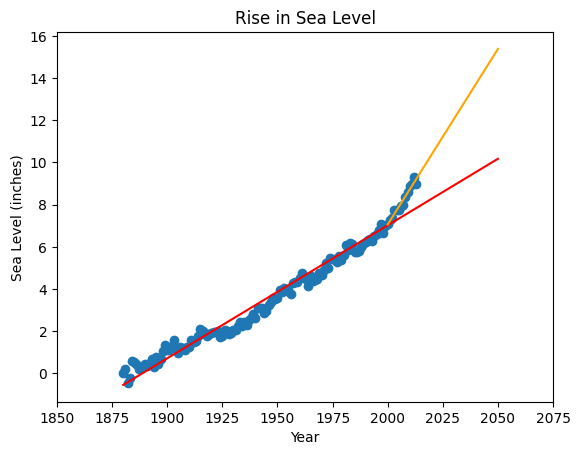

In [48]:
epa_x=pd.Series(epa_df['Year'])
epa_y=pd.Series(epa_df['CSIRO Adjusted Sea Level'])
slope, intercept, r_value, p_value, std_err = linregress(epa_x, epa_y)
predx=pd.Series(range(2014,2051,1))
appendx=pd.concat([epa_x,predx])
predy=pd.array(slope*appendx+intercept)

epa_2k=epa_df[epa_df['Year']>=2000]
epa_2kx=pd.Series(epa_2k['Year'])
epa_2ky=pd.Series(epa_2k['CSIRO Adjusted Sea Level'])
slope_2k, intercept_2k, r_value_2k, p_value_2k, std_err_2k = linregress(epa_2kx, epa_2ky)
appendx_2k=pd.concat([epa_2kx,predx])
predy_2k=pd.array(slope_2k*appendx_2k+intercept_2k)

f = plt.scatter(x=epa_x,y=epa_y,label='Actual Data')
#y = slope * x + intercept
plt.plot(appendx, predy, color='red', label='Regression Line')
plt.plot(appendx_2k, predy_2k, color='orange', label='Regression Line 2')
plt.xticks(np.arange(1850,2076,step=25))
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
f

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(epa_x, epa_y)
slope, intercept

(np.float64(0.06304458401213482), np.float64(-119.06594196773983))

In [50]:
predy_2k

<NumpyExtensionArray>
[  7.06107985777146,  7.227507131103323,  7.393934404435186,
  7.560361677767105,  7.726788951098968,   7.89321622443083,
  8.059643497762693,  8.226070771094555,  8.392498044426418,
   8.55892531775828,  8.725352591090143,  8.891779864422006,
  9.058207137753868,  9.224634411085788,   9.39106168441765,
  9.557488957749513,  9.723916231081375,  9.890343504413238,
   10.0567707777451, 10.223198051076963, 10.389625324408826,
 10.556052597740688,  10.72247987107255,  10.88890714440447,
 11.055334417736333, 11.221761691068195, 11.388188964400058,
  11.55461623773192, 11.721043511063783, 11.887470784395646,
 12.053898057727508, 12.220325331059371, 12.386752604391233,
 12.553179877723153, 12.719607151055015, 12.886034424386878,
  13.05246169771874, 13.218888971050603, 13.385316244382466,
 13.551743517714328, 13.718170791046191, 13.884598064378054,
 14.051025337709916, 14.217452611041836, 14.383879884373698,
  14.55030715770556, 14.716734431037423, 14.883161704369286,
 1